In [1]:

# Call of Duty Player Retention & Engagement Analytics
# Synthetic dataset: multiplayer sessions, performance, engagement, and retention label.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

plt.rcParams.update({"figure.figsize": (8,4)})
df = pd.read_csv("/mnt/data/cod_player_data.csv", parse_dates=["session_date"])
print("Rows:", len(df))
df.head()


Rows: 10000


,player_id,session_id,session_date,mode,map_name,weapon_primary,kills,deaths,assists,accuracy,...,rank,prestige_level,sessions_last_7d,avg_kd_ratio,hours_played_total,microtransactions_usd,region,device,returned_next_day,ab_group
0,221958,1,2025-03-07 00:00:00,Hardpoint,Favela,M4,11,13,4,0.285,...,Silver,0,5,0.86,87.0,0.00,APAC,PC,1,B
1,771155,2,2025-02-18 12:00:00,Team Deathmatch,Highrise,M4,9,13,3,0.273,...,Silver,2,4,0.71,42.9,0.84,LATAM,PC,0,B
2,231932,3,2025-08-14 19:00:00,Domination,Shipment,Shotgun,13,16,2,0.276,...,Diamond,0,5,0.82,126.6,0.00,APAC,Console,0,B
3,465838,4,2025-04-24 10:00:00,Team Deathmatch,Highrise,M4,14,15,1,0.224,...,Gold,2,5,0.94,132.9,9.94,EU,Console,1,B
4,359178,5,2025-01-20 14:00:00,Team Deathmatch,Favela,AK-47,16,11,4,0.381,...,Gold,0,3,1.42,156.2,0.00,NaN,PC,0,A


/tmp/ipykernel_144/4250217238.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(df.describe(include="all"))


,player_id,session_id,session_date,mode,map_name,weapon_primary,kills,deaths,assists,accuracy,...,rank,prestige_level,sessions_last_7d,avg_kd_ratio,hours_played_total,microtransactions_usd,region,device,returned_next_day,ab_group
count,10000.000000,10000.00000,10000,10000,10000,10000,10000.00000,10000.000000,10000.000000,10000.000000,...,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,5802,10000,10000.000000,10000
unique,NaN,NaN,5919,5,6,6,NaN,NaN,NaN,NaN,...,5,NaN,NaN,NaN,NaN,NaN,3,2,NaN,2
top,NaN,NaN,2025-07-07 19:00:00,Team Deathmatch,Verdansk,M4,NaN,NaN,NaN,NaN,...,Silver,NaN,NaN,NaN,NaN,NaN,EU,Console,NaN,A
freq,NaN,NaN,6,2664,1810,2207,NaN,NaN,NaN,NaN,...,2908,NaN,NaN,NaN,NaN,NaN,2816,5478,NaN,5111
first,NaN,NaN,2025-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2025-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,553200.087400,5000.50000,NaN,NaN,NaN,NaN,13.11820,10.354600,2.986400,0.280860,...,NaN,1.169800,6.158900,1.355349,121.464790,2.254574,NaN,NaN,0.418700,NaN
std,259824.382493,2886.89568,NaN,NaN,NaN,NaN,3.79793,3.261644,1.727169,0.079682,...,NaN,1.356301,2.485693,0.583283,58.669748,4.205809,NaN,NaN,0.493371,NaN
min,100126.000000,1.00000,NaN,NaN,NaN,NaN,2.00000,1.000000,0.000000,0.050000,...,NaN,0.000000,0.000000,0.210000,5.000000,0.000000,NaN,NaN,0.000000,NaN
25%,328114.500000,2500.75000,NaN,NaN,NaN,NaN,10.00000,8.000000,2.000000,0.227000,...,NaN,0.000000,4.000000,1.000000,80.875000,0.000000,NaN,NaN,0.000000,NaN



Retention rate: 0.419


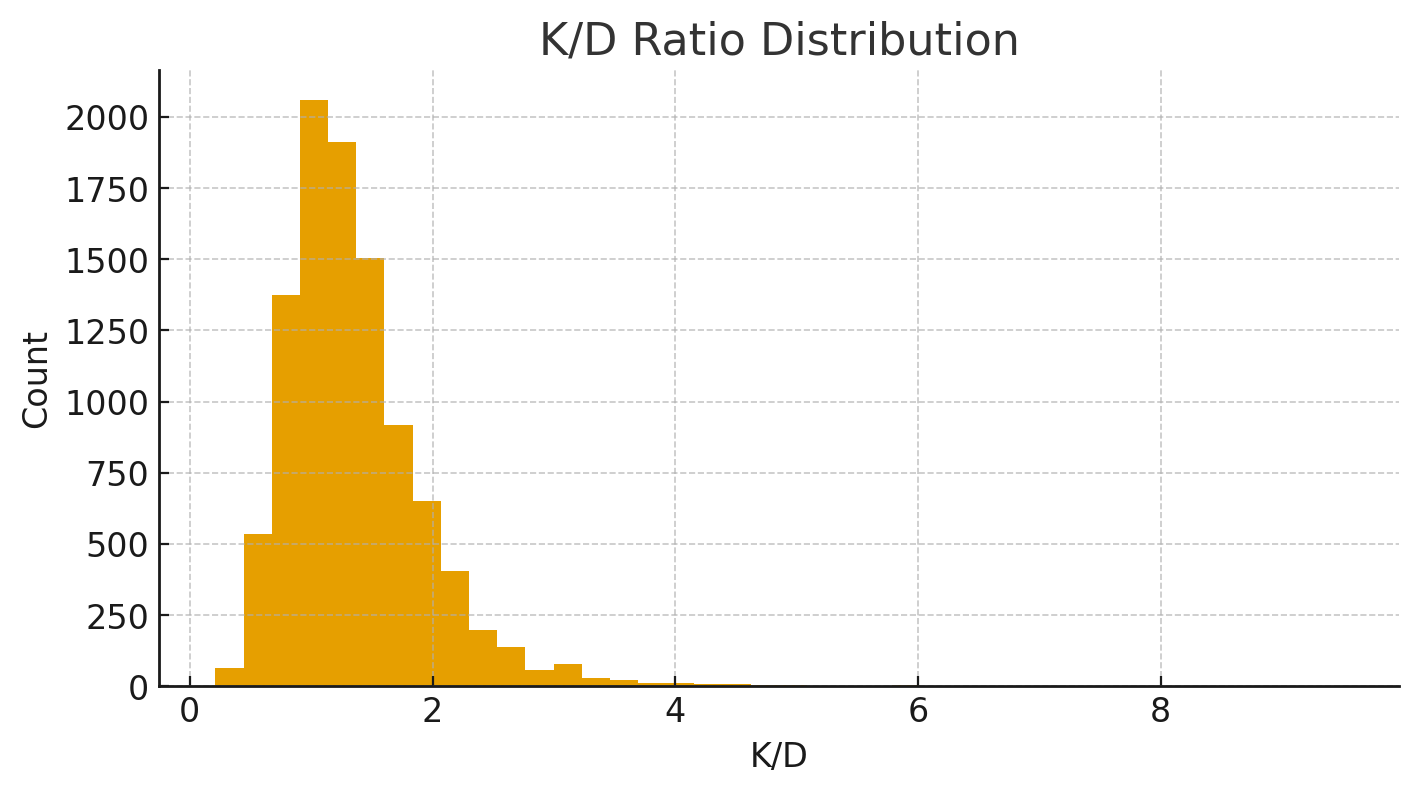

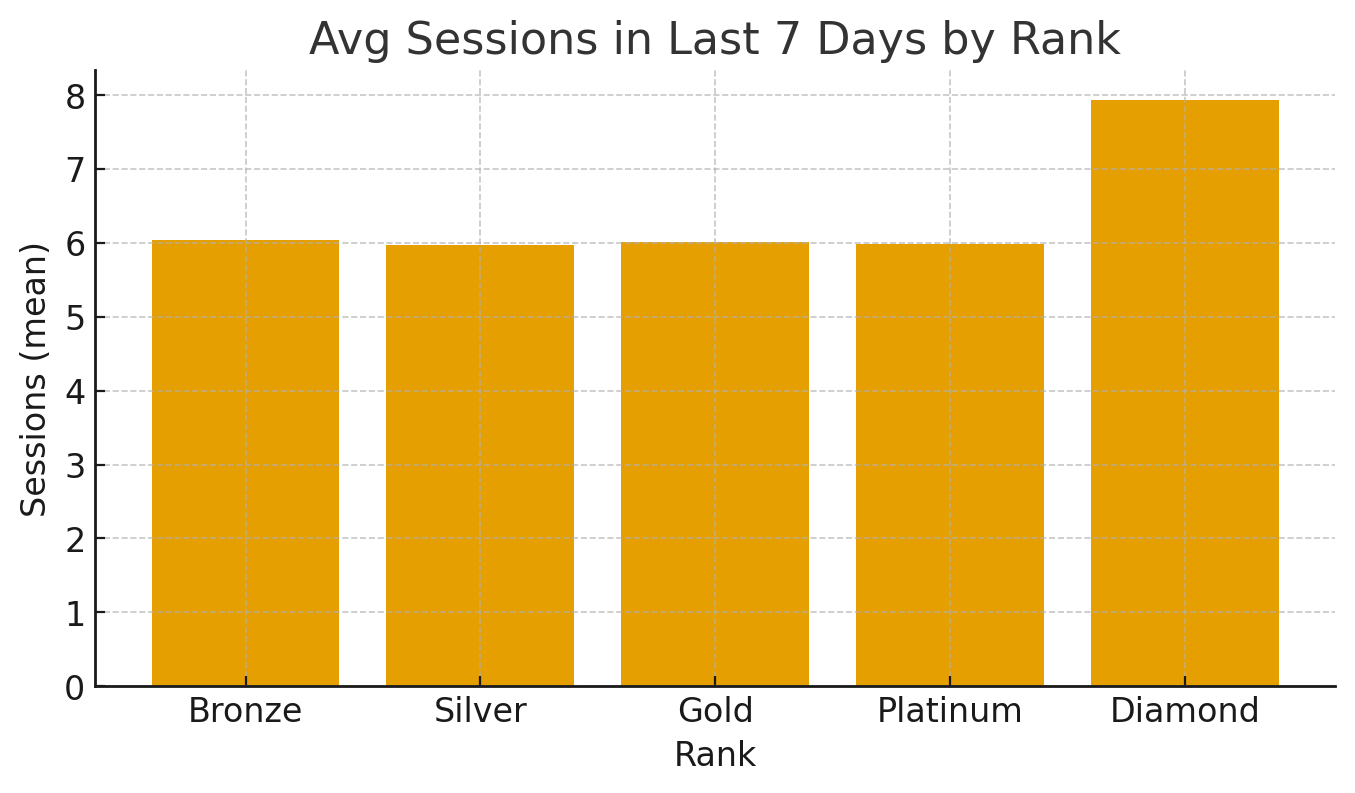

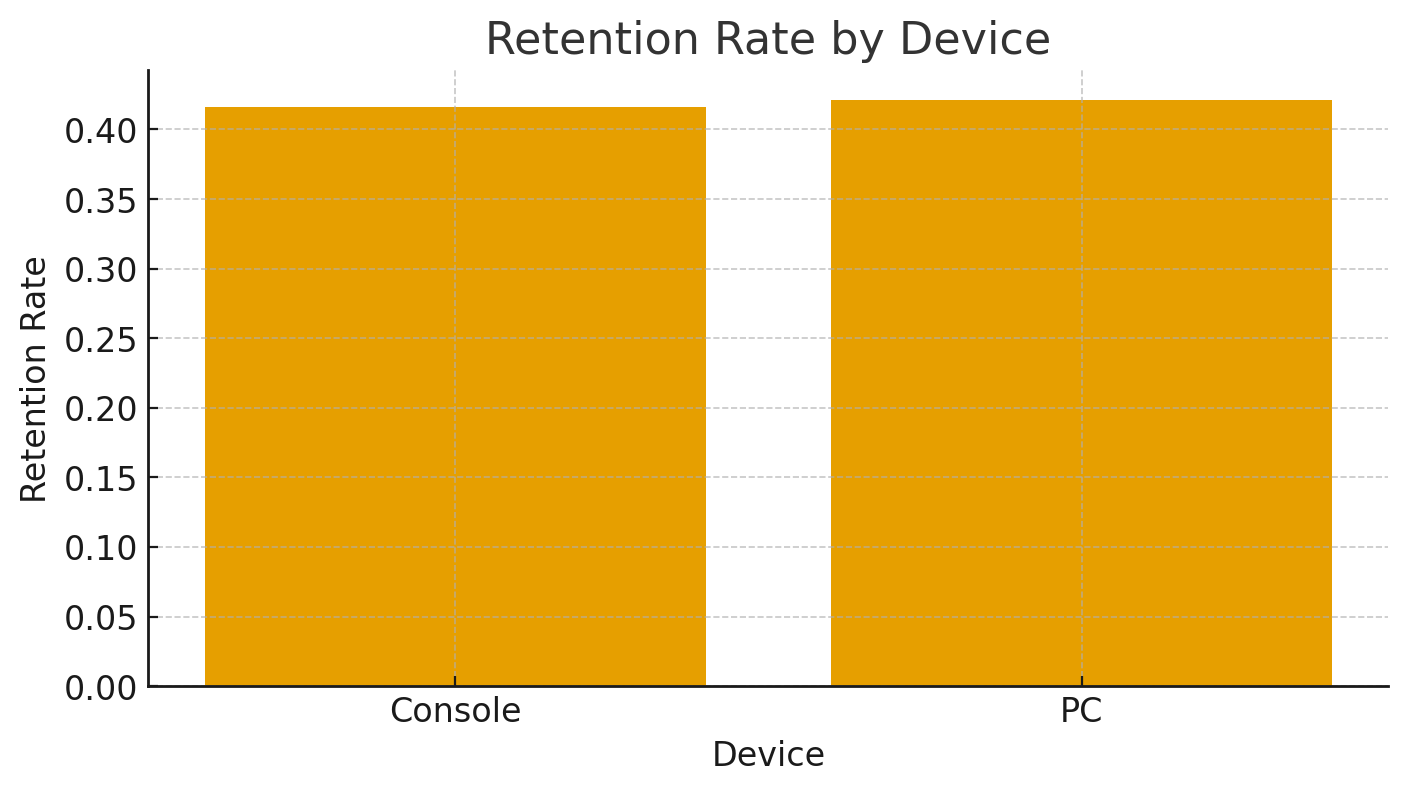

In [2]:

# --- Exploratory Data Analysis ---
display(df.describe(include="all"))
print("\nRetention rate:", df["returned_next_day"].mean().round(3))

# KD distribution
plt.figure()
plt.hist(df["avg_kd_ratio"], bins=40)
plt.title("K/D Ratio Distribution")
plt.xlabel("K/D"); plt.ylabel("Count")
plt.show()

# Sessions last 7d by rank (bar)
rank_order = ["Bronze","Silver","Gold","Platinum","Diamond"]
rank_means = df.groupby("rank")["sessions_last_7d"].mean().reindex(rank_order)
plt.figure()
plt.bar(rank_means.index, rank_means.values)
plt.title("Avg Sessions in Last 7 Days by Rank")
plt.xlabel("Rank"); plt.ylabel("Sessions (mean)")
plt.show()

# Retention by device
ret_by_device = df.groupby("device")["returned_next_day"].mean()
plt.figure()
plt.bar(ret_by_device.index, ret_by_device.values)
plt.title("Retention Rate by Device")
plt.xlabel("Device"); plt.ylabel("Retention Rate")
plt.show()


              precision    recall  f1-score   support

           0      0.597     0.813     0.689      1744
           1      0.479     0.239     0.319      1256

    accuracy                          0.573      3000
   macro avg      0.538     0.526     0.504      3000
weighted avg      0.548     0.573     0.534      3000



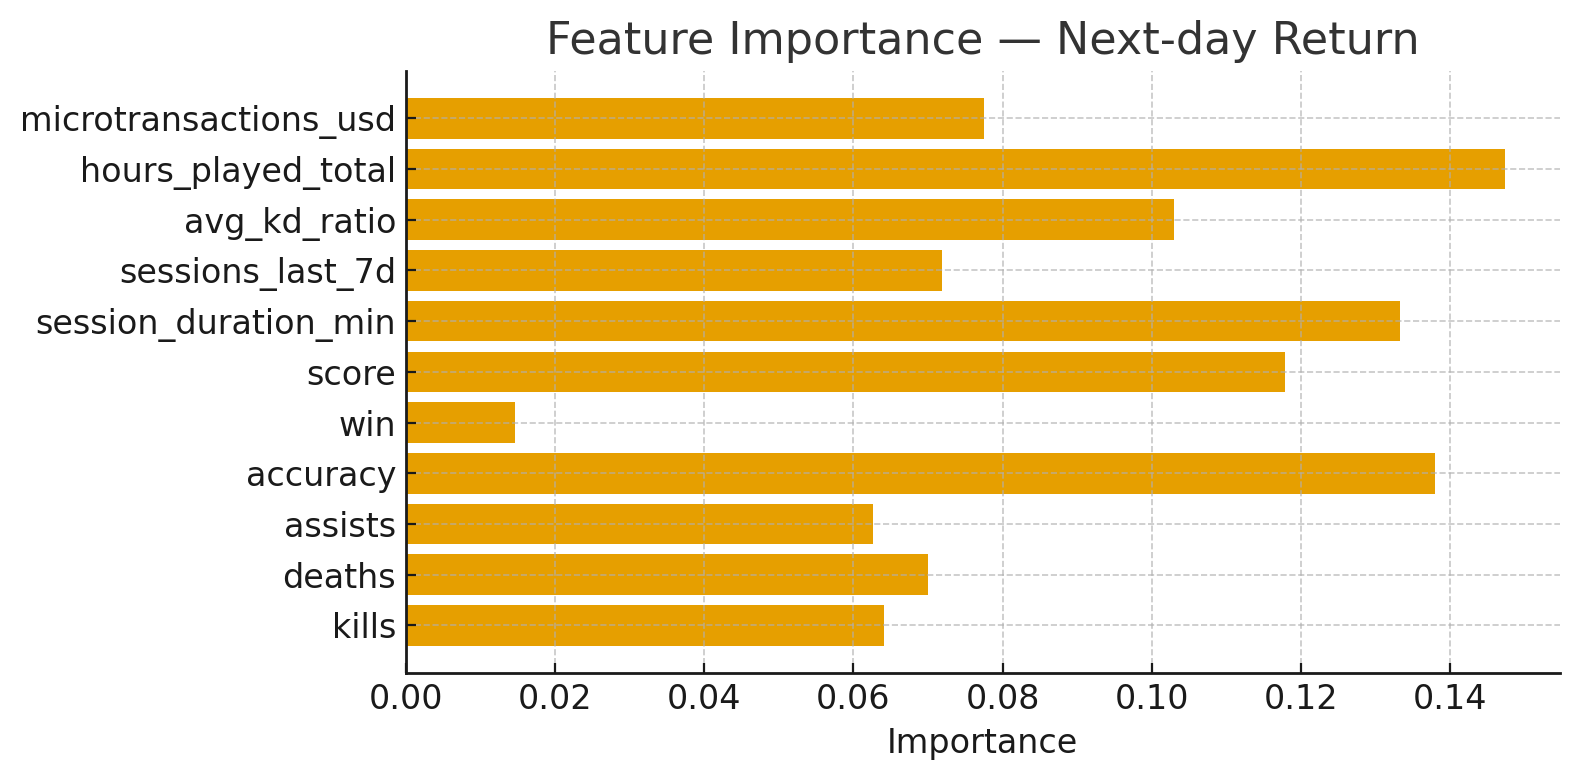

In [3]:

# --- Predictive Modeling: Next-day Return ---
features = ["kills","deaths","assists","accuracy","win","score",
            "session_duration_min","sessions_last_7d","avg_kd_ratio",
            "hours_played_total","microtransactions_usd"]
X = df[features]
y = df["returned_next_day"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model = RandomForestClassifier(n_estimators=250, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, digits=3))

# Feature importances
importances = model.feature_importances_
plt.figure()
plt.barh(features, importances)
plt.title("Feature Importance — Next-day Return")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


Retention A: 0.401 | Retention B: 0.438
T-stat: -3.731  p-value: 0.000192


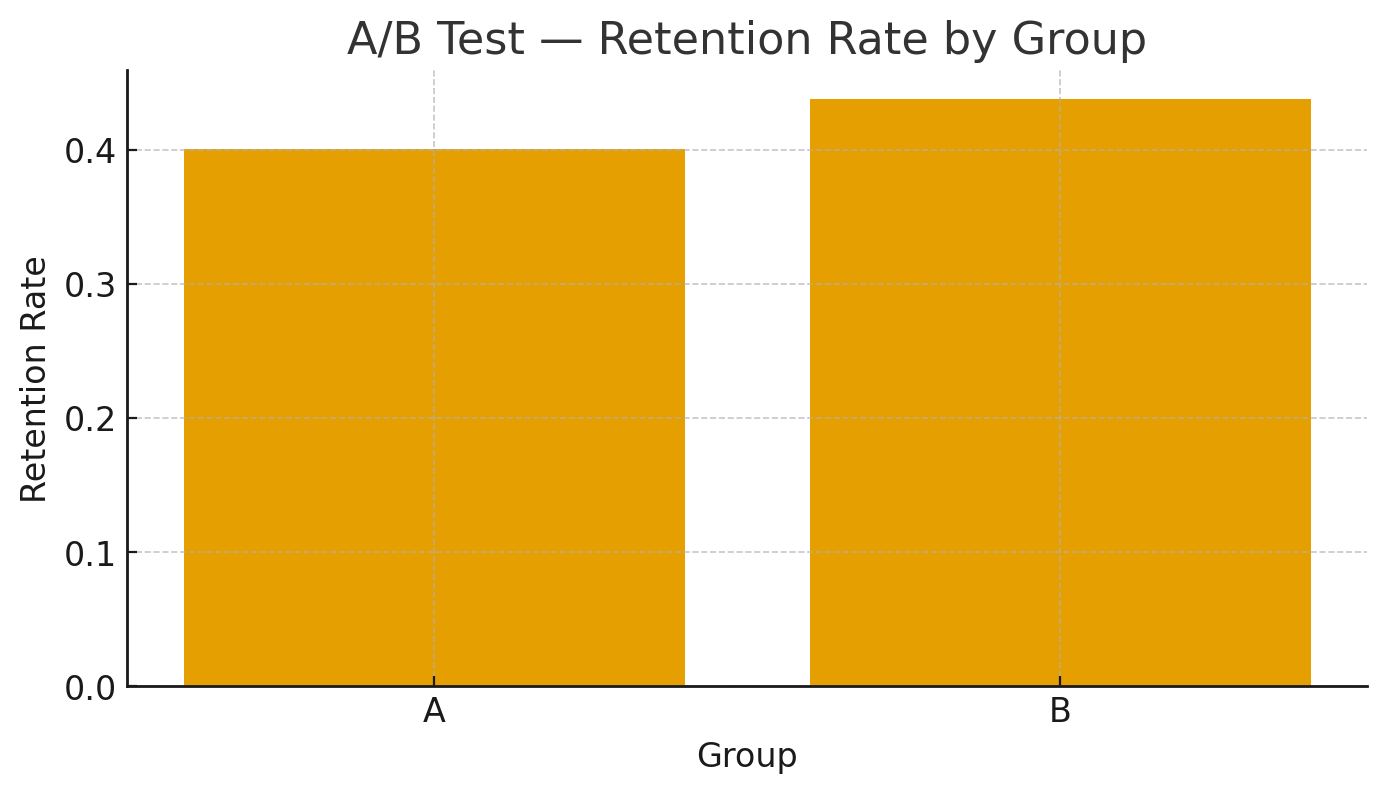

In [4]:

# --- A/B Test: Retention uplift (Group B vs Group A) ---
group_a = df.loc[df["ab_group"]=="A", "returned_next_day"]
group_b = df.loc[df["ab_group"]=="B", "returned_next_day"]

# Two-proportion z-test approximation using normal approx via ttest on proportions
# (Alternatively could use proportions_ztest from statsmodels if available)
a_mean, b_mean = group_a.mean(), group_b.mean()
t_stat, p_val = stats.ttest_ind(group_a, group_b, equal_var=False)

print(f"Retention A: {a_mean:.3f} | Retention B: {b_mean:.3f}")
print(f"T-stat: {t_stat:.3f}  p-value: {p_val:.6f}")

plt.figure()
plt.bar(["A","B"], [a_mean, b_mean])
plt.title("A/B Test — Retention Rate by Group")
plt.xlabel("Group"); plt.ylabel("Retention Rate")
plt.show()


In [5]:

# --- Map & Weapon summaries ---
map_duration = df.groupby("map_name")["session_duration_min"].mean().sort_values(ascending=False)
weapon_kd = (df.groupby("weapon_primary")[["kills","deaths"]].sum())
weapon_kd["kd"] = (weapon_kd["kills"] + 1) / (weapon_kd["deaths"] + 1)
weapon_kd = weapon_kd["kd"].sort_values(ascending=False)

print("Avg session duration by map (min):\n", map_duration.round(2))
print("\nTop weapons by aggregate K/D:\n", weapon_kd.round(2))

# Export Tableau-ready CSV (already exists, but ensure consistent path)
export_path = "/mnt/data/cod_player_data.csv"
df.to_csv(export_path, index=False)
print(f"Exported dataset to: {export_path}")


Avg session duration by map (min):
 map_name
Highrise    12.12
Verdansk    12.08
Shipment    12.05
Favela      12.05
Terminal    12.05
Rust        11.97
Name: session_duration_min, dtype: float64

Top weapons by aggregate K/D:
 weapon_primary
MP5        1.28
AK-47      1.27
LMG        1.27
M4         1.27
Sniper     1.25
Shotgun    1.25
Name: kd, dtype: float64


Exported dataset to: /mnt/data/cod_player_data.csv
